# Análise do componente principal (Principal Component Analysis - PCA)


## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Os dados
Vamos trabalhar com o conjunto de dados de câncer, pois ele tem muitos atributos.

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [ ]:
pd.read_excel()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [28]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [32]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [29]:
print(cancer['filename'])

C:\Users\Pablo Sivila\Anaconda3\lib\site-packages\sklearn\datasets\data\breast_cancer.csv


In [36]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

## Visualização de PCA

Como observamos antes, é difícil visualizar dados com muitas dimensões. Podemos usar o PCA para encontrar os dois primeiros componentes principais e visualizar os dados neste novo espaço bidimensional, com um único espaço de dispersão. Antes de fazer isso, precisamos normalizar nossos dados para que cada parâmetro tenha uma variância unitária.

In [38]:
#Normalizando o DataFrame. Só isso!

from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)

In [39]:
df_std

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

StandardScaler(copy=True, with_mean=True, with_std=True)

O PCA com o Scikit Learn usa um processo muito semelhante a outras funções de pré-processamento que acompanham o SciKit Learn. Nós instanciamos um objeto PCA, localizamos os componentes principais usando o método de ajuste e, em seguida, aplicamos a rotação e a redução da dimensionalidade chamando transform().

Também podemos especificar quantos componentes queremos manter ao criar o objeto PCA. Faça a reduçao para 2 componentes:

In [51]:
#Aplicando o PCA, reduzindo 30 colunas em 2 componentes.

from sklearn.decomposition import PCA 
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_std)

In [52]:
pd.DataFrame(Y_sklearn)

,0,1
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
5,2.380247,3.949929
6,2.238883,-2.690031
7,2.143299,2.340244
8,3.174924,3.391813
9,6.351747,7.727174


In [55]:
grafico = pd.DataFrame(Y_sklearn)

Agora, podemos transformar esses dados em seus dois primeiros componentes principais. Ou seja, as 30 colunas vão ser redimensionadas em 2

In [53]:
#Acima feito

In [15]:
scaled_data.shape

(569, 30)

In [16]:
x_pca.shape

(569, 2)

Ótimo! Reduzimos 30 dimensões para apenas 2! Vamos oplotar essas duas dimensões.

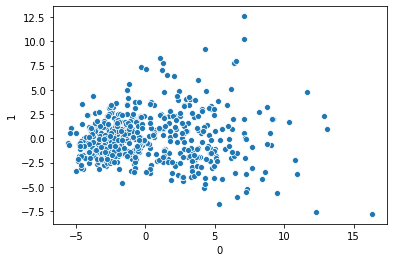

In [61]:
#Utilizando o Seaborn - Nova biblioteca de graficos, mais simples de aplicar.

sns.scatterplot(x = grafico[0], y = grafico[1] )

In [59]:
grafico['resultado'] = cancer['target']

In [60]:
grafico

,0,1,resultado
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
5,2.380247,3.949929,0
6,2.238883,-2.690031,0
7,2.143299,2.340244,0
8,3.174924,3.391813,0
9,6.351747,7.727174,0


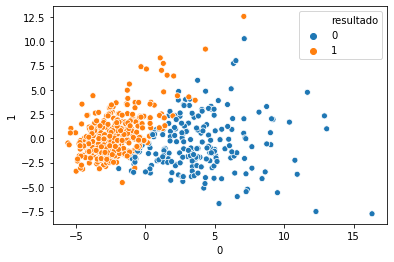

In [63]:
sns.scatterplot(x = grafico[0], y = grafico[1], hue = grafico['resultado'])

In [ ]:
#Com esse grafico podemos visualizar que os que estão com o target 1, estão dentro de tais carecteristicas localizando-se
#a esquerda do grafico
